In [ ]:
import matplotlib.pyplot as plt #https://matplotlib.org/stable/plot_types/index.html documentación
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.optimize import curve_fit #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from scipy import linalg, optimize
#from scipy.odr import Model, RealData, ODR
from scipy import odr
from scipy import signal
#from google.colab import drive
#drive.mount('/content/drive')


from IPython.display import Latex
from ipywidgets import interactive
#from IPython.display import FloatSliderWidget, IntSliderWidget
#from Ipython.html import widgets
#from IPython.html.widgets import FloatSliderWidget, IntSliderWidget
#%pylab inline --no-import-all

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Columnas detectadas: ['lambda', 'T(lambda)', '1/T', 'baseline', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Derivative Y1', 'Unnamed: 9', 'T(lambda).1', 'Derivative Y 2', 'A(lambda)']
Miaaaaaaaaaaaaau


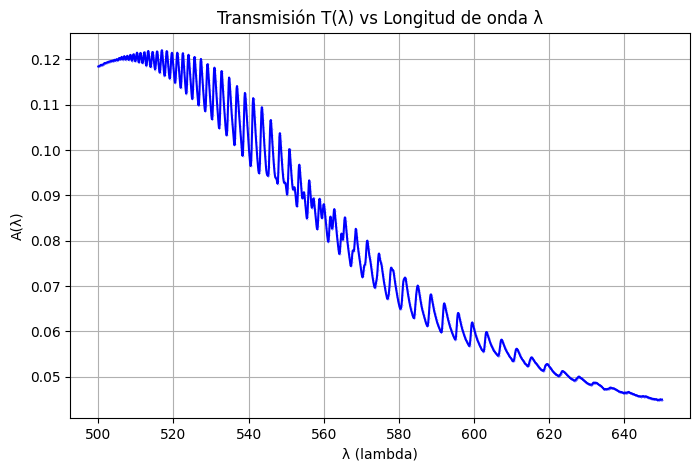

In [ ]:
# Ruta del archivo
filename = "/content/drive/MyDrive/EC/TP3/datosrobados.csv"

# Leer CSV considerando que los decimales usan coma
datos = pd.read_csv(
    filename,
    sep=',',
    quotechar='"',
    decimal=','  # <- esto asegura que '3,14' se interprete como 3.14
)

# Limpiar espacios en los nombres de columnas
datos.columns = datos.columns.str.strip()
datos['A(lambda)'] = -np.log10( datos['T(lambda)'] )
# Revisar columnas detectadas
print("Columnas detectadas:", datos.columns.tolist())


# Graficar T(lambda) vs lambda
plt.figure(figsize=(8,5))
plt.plot(datos['lambda'], datos['A(lambda)']+1.9, marker='o', linestyle='-', color='blue', markersize=0.1)
plt.xlabel("λ (lambda)")
plt.ylabel("A(λ)")
plt.title("Transmisión T(λ) vs Longitud de onda λ")
plt.grid(True)
plt.show()



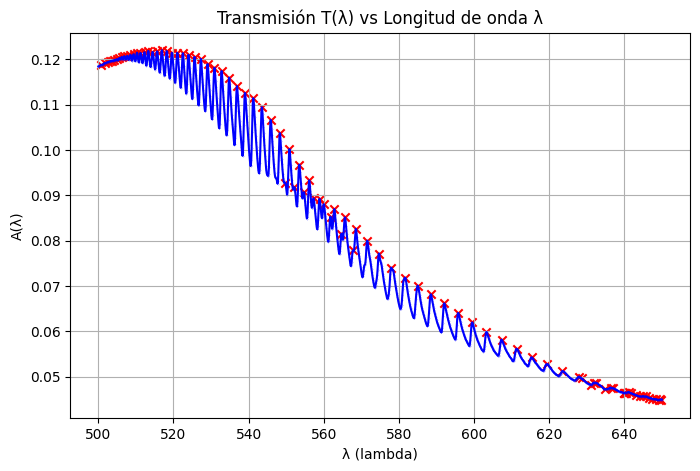

In [ ]:
def findpicos(A):
  return find_peaks(A)

indices, propiedades = findpicos(datos["A(lambda)"])
abs_peaks = []
for i in indices:
  abs_peaks.append(datos["A(lambda)"].iloc[i]+1.9)

#print(abs_peaks)



# Graficar T(lambda) vs lambda
plt.figure(figsize=(8,5))
plt.plot(datos['lambda'], datos['A(lambda)']+1.9, marker='o', linestyle='-', color='blue', markersize=0.1)
plt.scatter(datos['lambda'].iloc[indices], abs_peaks, color='red', marker='x')
plt.xlabel("λ (lambda)")
plt.ylabel("A(λ)")
plt.title("Transmisión T(λ) vs Longitud de onda λ")
plt.grid(True)
plt.show()




Miaaaaaaaaaaaaau
Miaaaaaaaaaaaaau


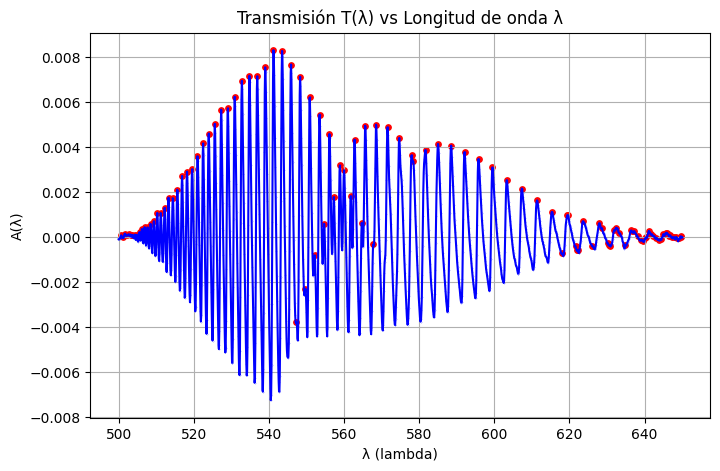

In [ ]:
kernel = signal.butter(2, 0.02, 'hp')
filtered = signal.filtfilt(*kernel, datos["A(lambda)"]+1.9)

indices, propiedades = findpicos(filtered)
abs_peaks = []


for i in indices:
    #print('Miaaaaaaaaaaaaau', i)
    abs_peaks.append(filtered[i])


plt.figure(figsize=(8,5))
# plt.plot(datos['lambda'], datos['A(lambda)']+1.9, marker='o', linestyle='-', color='blue', markersize=0.1)
plt.scatter(datos['lambda'].iloc[indices], abs_peaks, color='red', marker='o', s=15)
# plt.scatter(datos['lambda'].iloc[indices], abs_peaks, color='red', marker='x')
plt.xlabel("λ (lambda)")
plt.ylabel("A(λ)")
plt.plot(datos['lambda'], filtered, marker='o', linestyle='-', color='blue', markersize=0.1)
plt.title("Transmisión T(λ) vs Longitud de onda λ")
plt.grid(True)
plt.show()


In [ ]:
#Diferenciarlos
abs_peaks= np.array(abs_peaks)
# print(abs_peaks.min())

# #Busco donde esta
# print(np.where(abs_peaks.min()))


idx_min = np.where(abs_peaks == abs_peaks.min())
print(idx_min)
print(abs_peaks[idx_min])

df_picos = pd.DataFrame({
    "lambda": datos["lambda"].iloc[indices].values,
    "A(lambda)": abs_peaks
})

mayores_580 = df_picos[df_picos["lambda"] > 580]

# Tomar el primero (el de menor lambda entre los >580)
siguiente_pico = mayores_580.iloc[0]

print("λ:", siguiente_pico["lambda"])
print("A(λ):", siguiente_pico["A(lambda)"])
# print(abs_peaks)

idx_post580 = np.where(abs_peaks == 0.003869199925284451)
print(idx_post580)
print(abs_peaks[idx_post580])
#df_picos

#entonces: (0-38) sabemos que es el de mayor energia (seguro v''=2) <- en realidad al reves; v''=0 es el de mayor energia
# (59-....) sabemos que es el de menor energia (seguro v''=0); suponemos que 58 tmb

Miaaaaaaaaaaaaau
(array([38]),)
[-0.0037966]
λ: 581.7
A(λ): 0.003869199925284451
(array([59]),)
[0.0038692]


Miaaaaaaaaaaaaau


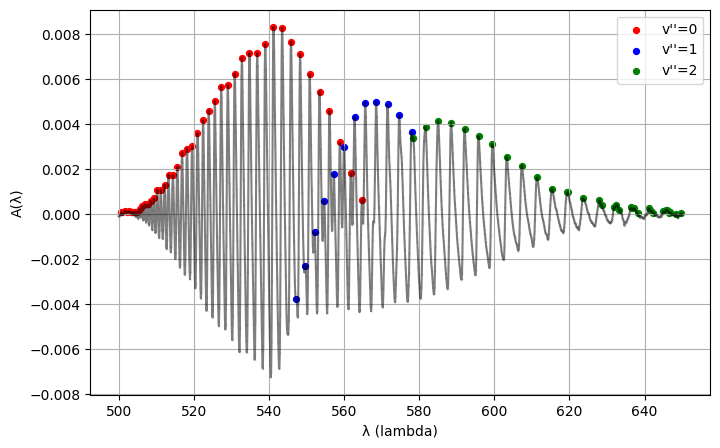

In [ ]:
# Definimos los conjuntos de índices
nu_0_ind = list(range(0, 38)) + [39, 41, 43, 45, 47, 49, 51, 53]
nu_1_ind= [38,40,42,44,46,48,50,52,54,55,56,57]
nu_2_ind = df_picos.loc[58:].query('`A(lambda)` > 0').index

# Creamos los DataFrames filtrando por índice y seleccionando las columnas deseadas
df_nu0 = df_picos.loc[nu_0_ind, ['lambda', 'A(lambda)']].copy()
df_nu1 = df_picos.loc[nu_1_ind, ['lambda', 'A(lambda)']].copy()
df_nu2 = df_picos.loc[nu_2_ind, ['lambda', 'A(lambda)']].copy()


plt.figure(figsize=(8,5))

# Filtramos df_nu0 por valores positivos
df_nu0_pos = df_nu0[df_nu0['A(lambda)'] > 0]

# Graficamos con labels
plt.scatter(df_nu0_pos["lambda"], df_nu0_pos['A(lambda)'], color='red', marker='o', s=18, label=r"v''=0")
plt.scatter(df_nu1["lambda"], df_nu1['A(lambda)'], color='blue', marker='o', s=18, label=r"v''=1")
plt.scatter(df_nu2["lambda"], df_nu2['A(lambda)'], color='green', marker='o', s=18, label=r"v''=2")

# Curva de fondo
plt.plot(datos['lambda'], filtered, marker='o', linestyle='-', alpha=0.5, color='black', markersize=0.1)

plt.xlabel("λ (lambda)")
plt.ylabel("A(λ)")

plt.grid(True)
plt.legend()  # Agrega la leyenda
plt.show()


## Análisis 1 (Acomodar los nu y ajustes cuadraticos)

In [ ]:
#defino valores de constantes
h = 6.626e-34  # J·s
h_bar = 1.0545718e-34 # J.s
c = 3e8        # m/s
h_bar_eV = 6.58e-16 #eV
c_cm = 3e10 # cm

#armo funciones que voy a usar
def calcular_energia(lam):
    # Convertir lambda a metros si está en nm
    lambda_m = lam * 1e-9
    return h * c / (lambda_m*1.602e-19)

def cuad(nu,a,b,c):
    return a + b * (nu + 1/2) + c * (nu + 1/2)**2

In [ ]:

#Acomodamos los datos
lambda_nu_2 = df_picos.loc[nu_2_ind, 'lambda']
lambda_nu_1 = df_picos.loc[nu_1_ind, 'lambda']
lambda_nu_0 = df_picos.loc[nu_0_ind, 'lambda']

nu_0 = list(range(62, 15, -1))[:len(lambda_nu_0)]
nu_1 = list(range(62, 15,-1))[:len(lambda_nu_1)]
nu_2 = list(range(62, 15,-1))[:len(lambda_nu_2)]

E= calcular_energia(560)
E_0= calcular_energia(lambda_nu_0)
E_1= calcular_energia(lambda_nu_1)
E_2= calcular_energia(lambda_nu_2)

#Buscamos el offset de los nu (a mano, encontramos a = 35 para nu1 y a = 45 para nu2)
#Tambien nos quedamos solo con los ultimos 13 valores del set nu2
df_NU0 = pd.DataFrame({
'nu_0': nu_0,
'E_0': E_0
})
df_NU1 = pd.DataFrame({
'nu_1': np.array(nu_1)-35,
'E_1': E_1})
df_NU2_mal = pd.DataFrame({
'nu_2': np.array(nu_2)-45,
'E_2': E_2
})
df_NU2 = df_NU2_mal.head(12)

#Esto es lo que usamos para encontrar el corrimiento, el a que minimice la desviacion estandar de la diferencia
#df_comb = pd.merge(df_NU0, df_NU1, left_on='nu_0', right_on='nu_1')
# Calculamos la desviación estándar entre E_0 y E_1 para cada fila
# df_comb['DeltaE']=df_comb['E_0']-df_comb['E_1']
# print(np.std(df_comb['DeltaE']))

#df_comb2 = pd.merge(df_NU1, df_NU2, left_on='nu_1', right_on='nu_2')
#df_comb2['DeltaE']=df_comb2['E_1']-df_comb2['E_2']
#print(np.std(df_comb2['DeltaE']))

Miaaaaaaaaaaaaau


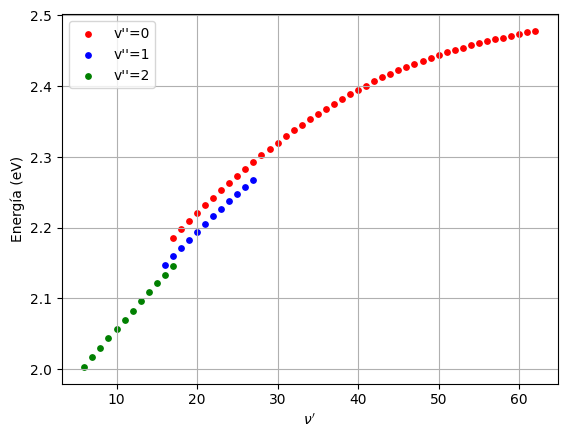

In [ ]:
#Grafico de como quedan acomodados con los nu correctos
plt.scatter(df_NU0["nu_0"],df_NU0["E_0"], color='red', marker='o', s=15,label=r"v''=0")
plt.scatter(df_NU1["nu_1"], df_NU1["E_1"], color='blue', marker='o', s=15, label=r"v''=1")
plt.scatter(df_NU2["nu_2"], df_NU2["E_2"], color='green', marker='o', s=15, label=r"v''=2")
print('Miaaaaaaaaaaaaau')
plt.xlabel(r"$\nu'$")
plt.ylabel("Energía (eV)")

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Agrego la columna de los lambda y el nu corrido 1/2 a los dataframes
df_NU0['lambda'] = lambda_nu_0
df_NU1['lambda'] = lambda_nu_1
df_NU2['lambda'] = lambda_nu_2
df_NU0['nu_0_sum']= df_NU0['nu_0']+1/2
df_NU1['nu_1_sum']= df_NU1['nu_1']+1/2
df_NU2['nu_2_sum']= df_NU2['nu_2']+1/2
# Esto tira error porque no le gusta mandar listas enteras a un dataframe, pero funciona

/tmp/ipython-input-2754611462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NU2['lambda'] = lambda_nu_2
/tmp/ipython-input-2754611462.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NU2['nu_2_sum']= df_NU2['nu_2']+1/2


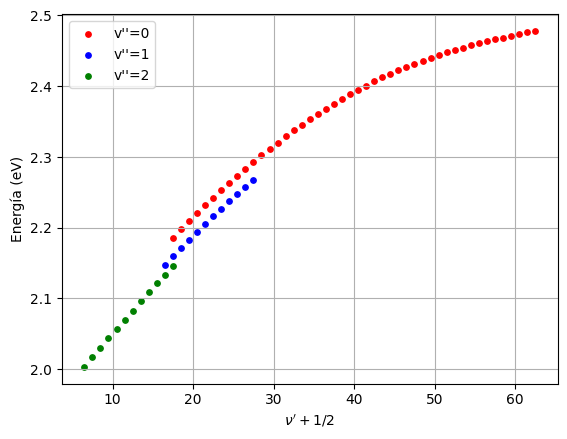

In [ ]:
# Grafico ahora en funcion del nu corrido 1/2, que es la variable que vamos a usar para el ajuste cuadratico
plt.scatter(df_NU0['nu_0_sum'], df_NU0['E_0'], s=15, color='red', label=r"v''=0")
plt.scatter(df_NU1['nu_1_sum'], df_NU1['E_1'], s=15, color='blue', label=r"v''=1")
plt.scatter(df_NU2['nu_2_sum'], df_NU2['E_2'], s=15, color='green', label=r"v''=2")

plt.xlabel(r"$\nu' + 1/2$")
plt.ylabel("Energía (eV)")
plt.legend()
plt.grid(True)
plt.show()

Ajustes cuadraticos.
Nota 2: checkear unidades, capaz hay que pasar todo a cm y A

Miaaaaaaaaaaaaau
a0 = 1.9356 ± 0.0015
b0 = 0.016078 ± 0.000078
c0 = -0.000119 ± 0.000001
R² = 0.99987


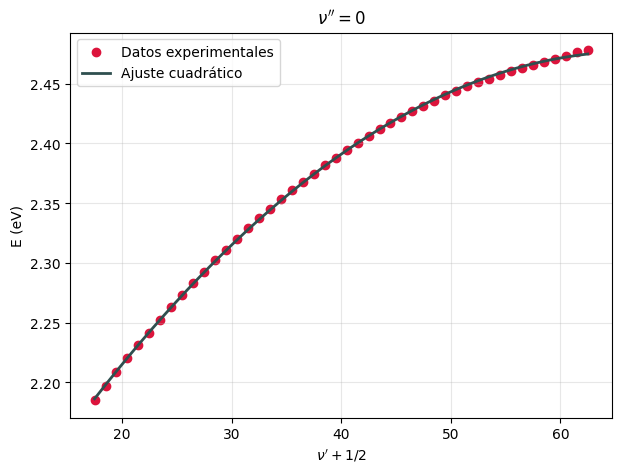

In [ ]:
# Para nu' = 0
xdata_0 = df_NU0['nu_0_sum']
ydata_0 = df_NU0['E_0']
print('Miaaaaaaaaaaaaau')
popt, pcov = curve_fit(
    cuad,
    xdata_0,
    ydata_0,
    p0=[0.0001, 0.001, 0.00003],           # valores iniciales
    #bounds=([0, 0], [1, 0.1], )  # límites inferior y superior
)

# --- Parámetros ajustados e incertidumbres ---
a_0, b_0, c_0 = popt
a_err0, b_err0, c_err0 = np.sqrt(np.diag(pcov))

# --- Resultados ---
print(f"a0 = {a_0:.4f} ± {a_err0:.4f}")
print(f"b0 = {b_0:.6f} ± {b_err0:.6f}")
print(f"c0 = {c_0:.6f} ± {c_err0:.6f}")

# --- Cálculo del R² ---
residuos = ydata_0 - cuad(xdata_0, *popt)
ss_res = np.sum(residuos**2)
ss_tot = np.sum((ydata_0 - np.mean(ydata_0))**2)
r2 = 1 - (ss_res / ss_tot)
print(f"R² = {r2:.5f}")

# --- Gráfico ---
nu_fit_0 = np.linspace(min(xdata_0), max(xdata_0), 300)
E_fit_0 = cuad(nu_fit_0, *popt)

plt.figure(figsize=(7,5))
plt.scatter(xdata_0, ydata_0, color='crimson', label='Datos experimentales')
plt.plot(nu_fit_0, E_fit_0, color='darkslategray', lw=2, label='Ajuste cuadrático')
plt.xlabel(r"$\nu'+1/2$")
plt.ylabel('E (eV)')
plt.title(r"$\nu''=0$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

a1 = 1.9083 ± 0.0020
b1 = 0.015930 ± 0.000177
c1 = -0.000111 ± 0.000004
R² = 0.99999


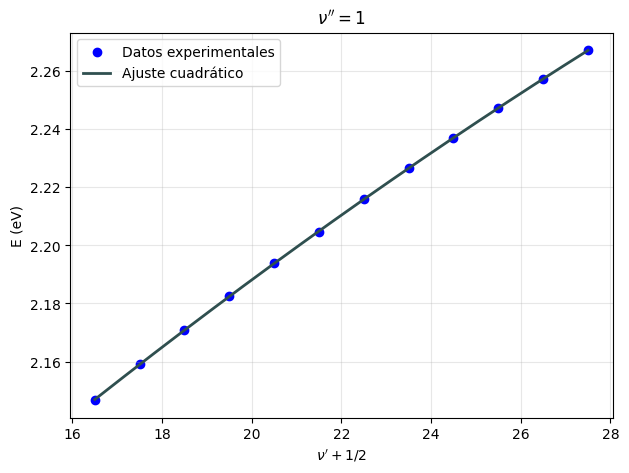

In [ ]:
# Para nu' = 1
xdata_1 = df_NU1['nu_1_sum']
ydata_1 = df_NU1['E_1']

# --- Ajuste con límites (bounds) ---
# Ejemplo: w_e > 0, chi_e > 0 y chi_e < 0.1
popt, pcov = curve_fit(
    cuad,
    xdata_1,
    ydata_1,
    p0=[1, 0.01, 1],           # valores iniciales
    #bounds=([0, 0], [1, 0.1], )  # límites inferior y superior
)

# --- Parámetros ajustados e incertidumbres ---
a_1, b_1, c_1 = popt
a_err1, b_err1, c_err1 = np.sqrt(np.diag(pcov))

# --- Resultados ---
print(f"a1 = {a_1:.4f} ± {a_err1:.4f}")
print(f"b1 = {b_1:.6f} ± {b_err1:.6f}")
print(f"c1 = {c_1:.6f} ± {c_err1:.6f}")

# --- Cálculo del R² ---
residuos = ydata_1 - cuad(xdata_1, *popt)
ss_res = np.sum(residuos**2)
ss_tot = np.sum((ydata_1 - np.mean(ydata_1))**2)
r2 = 1 - (ss_res / ss_tot)
print(f"R² = {r2:.5f}")

# --- Gráfico ---
nu_fit_1 = np.linspace(min(xdata_1), max(xdata_1), 300)
E_fit_1 = cuad(nu_fit_1, *popt)

plt.figure(figsize=(7,5))
plt.scatter(xdata_1, ydata_1, color='blue', label='Datos experimentales')
plt.plot(nu_fit_1, E_fit_1, color='darkslategray', lw=2, label='Ajuste cuadrático')
plt.xlabel(r"$\nu'+1/2$")
plt.ylabel('E (eV)')
plt.title(r"$\nu''=1$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

a2 = 1.9038 ± 0.0012
b2 = 0.014628 ± 0.000196
c2 = -0.000067 ± 0.000008
R² = 0.99997


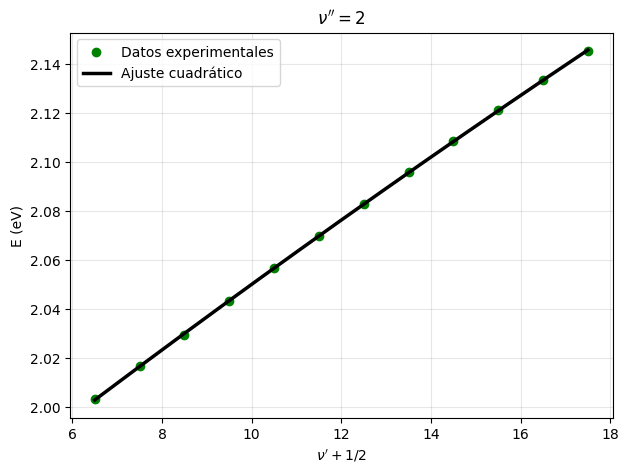

In [ ]:
# nu' = 2
xdata_2 = df_NU2['nu_2_sum']
ydata_2 = df_NU2['E_2']

# --- Ajuste con límites (bounds) ---
# Ejemplo: w_e > 0, chi_e > 0 y chi_e < 0.1
popt, pcov = curve_fit(
    cuad,
    xdata_2,
    ydata_2,
    p0=[1, 0.01, 1],           # valores iniciales
    #bounds=([0, 0], [1, 0.1], )  # límites inferior y superior
)

# --- Parámetros ajustados e incertidumbres ---
a_2, b_2, c_2 = popt
a_err2, b_err2, c_err2 = np.sqrt(np.diag(pcov))

# --- Resultados ---
print(f"a2 = {a_2:.4f} ± {a_err2:.4f}")
print(f"b2 = {b_2:.6f} ± {b_err2:.6f}")
print(f"c2 = {c_2:.6f} ± {c_err2:.6f}")

# --- Cálculo del R² ---
residuos = ydata_2 - cuad(xdata_2, *popt)
ss_res = np.sum(residuos**2)
ss_tot = np.sum((ydata_2 - np.mean(ydata_2))**2)
r2 = 1 - (ss_res / ss_tot)
print(f"R² = {r2:.5f}")

# --- Gráfico ---
nu_fit_2 = np.linspace(min(xdata_2), max(xdata_2), 300)
E_fit_2 = cuad(nu_fit_2, *popt)

plt.figure(figsize=(7,5))
plt.scatter(xdata_2, ydata_2, color='green', label='Datos experimentales')
plt.plot(nu_fit_2, E_fit_2, color='black', lw=2.5, label='Ajuste cuadrático')
plt.xlabel(r"$\nu'+1/2$")
plt.ylabel('E (eV)')
plt.title(r"$\nu''=2$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

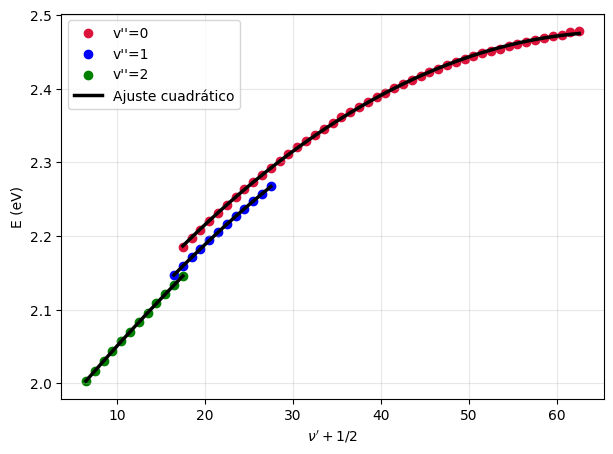

In [ ]:
# Grafico de los tres conjuntos juntos
plt.figure(figsize=(7,5))
plt.scatter(xdata_0, ydata_0, color='crimson', label=r"v''=0")
plt.plot(nu_fit_0, E_fit_0, color='black', lw=2.5)
plt.scatter(xdata_1, ydata_1, color='blue', label=r"v''=1")
plt.plot(nu_fit_1, E_fit_1, color='black', lw=2.5)
plt.scatter(xdata_2, ydata_2, color='green', label=r"v''=2")
plt.plot(nu_fit_2, E_fit_2, color='black', lw=2.5,label='Ajuste cuadrático')
plt.xlabel(r"$\nu'+1/2$")
plt.ylabel('E (eV)')
# plt.title('Ajuste cuadrático $E(\nu) = w_e(\nu+1/2) - w_e \chi_e (\nu+1/2)^2$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Ahora querria sacar los valores a partir del ajuste a partir del sistema de ecuaciones
print(f"a0 = {a_0:.4f} ± {a_err0:.4f}, b0 = {b_0:.4f} ± {b_err0:.4f}, c0 = {c_0:.6f} ± {c_err0:.6f}")
print(f"a1 = {a_1:.4f} ± {a_err1:.4f}, b1 = {b_1:.4f} ± {b_err1:.4f}, c1 = {c_1:.6f} ± {c_err1:.6f}")
print(f"a2 = {a_2:.4f} ± {a_err2:.4f}, b2 = {b_2:.4f} ± {b_err2:.4f}, c2 = {c_2:.6f} ± {c_err2:.6f}")
#valores de referencia


a0 = 1.9356 ± 0.0015, b0 = 0.0161 ± 0.0001, c0 = -0.000119 ± 0.000001
a1 = 1.9083 ± 0.0020, b1 = 0.0159 ± 0.0002, c1 = -0.000111 ± 0.000004
a2 = 1.9038 ± 0.0012, b2 = 0.0146 ± 0.0002, c2 = -0.000067 ± 0.000008


a0 = 1.935606 ± 0.001088
a1 = 1.909143 ± 0.000970
a2 = 1.894540 ± 0.000659
b  = 0.016076 ± 0.000057
c  = -0.000119 ± 0.000001

--- Estadísticos del ajuste ---
R² global       = 0.999956
χ² reducido     = 8.877028e-07
AIC             = -970.612
BIC             = -959.369


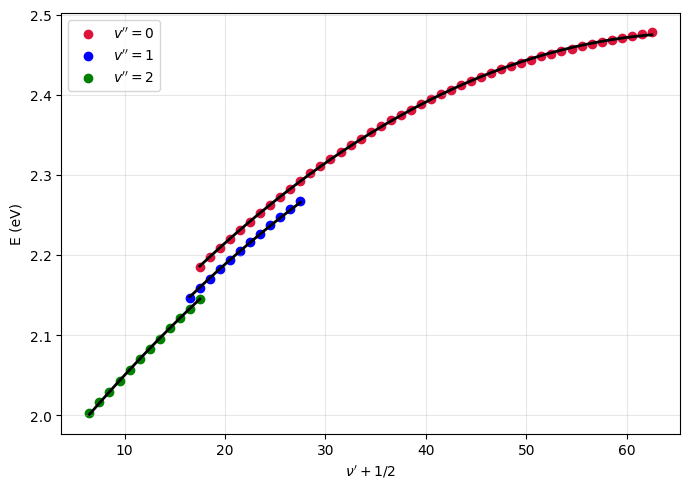

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Datos ---
x0, y0 = df_NU0['nu_0_sum'].values, df_NU0['E_0'].values
x1, y1 = df_NU1['nu_1_sum'].values, df_NU1['E_1'].values
x2, y2 = df_NU2['nu_2_sum'].values, df_NU2['E_2'].values

# --- Combinar todos los datos ---
xdata = np.concatenate([x0, x1, x2])
ydata = np.concatenate([y0, y1, y2])
v_index = np.concatenate([
    np.zeros_like(x0),  # 0 para v''=0
    np.ones_like(x1),   # 1 para v''=1
    np.full_like(x2, 2) # 2 para v''=2
])

# --- Modelo global ---
def cuad_multi(nu_v, a0, a1, a2, b, c):
    nu, v = nu_v
    a = np.choose(v.astype(int), [a0, a1, a2])
    return a + b * (nu + 0.5) + c * (nu + 0.5)**2

# --- Ajuste simultáneo ---
p0 = [0.0, 0.1, 0.2, 1.0, 0.01]
popt, pcov = curve_fit(cuad_multi, (xdata, v_index), ydata, p0=p0)

a0, a1, a2, b, c = popt
a0_err, a1_err, a2_err, b_err, c_err = np.sqrt(np.diag(pcov))

print(f"a0 = {a0:.6f} ± {a0_err:.6f}")
print(f"a1 = {a1:.6f} ± {a1_err:.6f}")
print(f"a2 = {a2:.6f} ± {a2_err:.6f}")
print(f"b  = {b:.6f} ± {b_err:.6f}")
print(f"c  = {c:.6f} ± {c_err:.6f}")

# --- Métricas del ajuste ---
residuos = ydata - cuad_multi((xdata, v_index), *popt)
n = len(ydata)
p = len(popt)

# R² global
ss_res = np.sum(residuos**2)
ss_tot = np.sum((ydata - np.mean(ydata))**2)
r2 = 1 - ss_res / ss_tot

# Chi cuadrado reducido
chi2 = np.sum((residuos)**2)  # si tuvieras incertidumbres σ_i, usarías (residuos/σ_i)**2
chi2_red = chi2 / (n - p)

# AIC y BIC (criterios de información)
aic = n * np.log(ss_res/n) + 2 * p
bic = n * np.log(ss_res/n) + p * np.log(n)

print("\n--- Estadísticos del ajuste ---")
print(f"R² global       = {r2:.6f}")
print(f"χ² reducido     = {chi2_red:.6e}")
print(f"AIC             = {aic:.3f}")
print(f"BIC             = {bic:.3f}")

# --- Gráficos ---
colors = ['crimson', 'blue', 'green']
labels = [r"$v''=0$", r"$v''=1$", r"$v''=2$"]

plt.figure(figsize=(7,5))
for i, (x, y, color, label) in enumerate(zip([x0, x1, x2], [y0, y1, y2], colors, labels)):
    plt.scatter(x, y, color=color, label=label)
    x_fit = np.linspace(min(x), max(x), 300)
    plt.plot(x_fit, cuad_multi((x_fit, np.full_like(x_fit, i)), *popt),
             color='black', lw=2.0)

plt.xlabel(r"$\nu' + 1/2$")
plt.ylabel("E (eV)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Para el estado excitado los coeficientes vendran dados por
def coef(a):
    return a/h_bar
def ref_unidades(valor):
    return h_bar_eV *2*np.pi*c*100*valor/h_bar

# Valores de referencia estado excitado:
# w = 129.8 ; wX = 0.985

w_exc0 = coef(b_0) #queda en 1/seg
wX_exc0 = - coef(c_0)
w_exc1 = coef(b_1)
wX_exc1 = - coef(c_1)
w_exc2 = coef(b_2)
wX_exc2 = - coef(c_2)

#quedan levemente diferentes dependiendo de que nu'' use, hay que promediar
# E = hc/lamba = hc k
w_exc = (w_exc0+w_exc1+w_exc2)/3
wX_exc = (wX_exc0+wX_exc1+wX_exc2)/3

ref_w_e = ref_unidades(129.8)
ref_wX_e = ref_unidades(0.985)
print('Para el estado excitado')
print('omega (1/s)',w_exc,'de referencia = ',ref_w_e)
print('omega chi (1/s)',wX_exc,'de referencia = ',ref_wX_e)

Para el estado excitado
omega (1/s) 1.4740694933645862e+32 de referencia =  -6.071261564735878e+19
omega chi (1/s) 9.39693595450129e+29 de referencia =  -4.607236241344252e+17


In [ ]:
#Armo el sistema de ecuaciones para buscar los coeficientes del estado fundamental
#defino el lado izquierdo: $Delta E$, w'', X''w'' en ese orden para nu=0,1,2
izq = np.array([[1, -h_bar/2, h_bar/4], [1, -h_bar*3/2, h_bar*9/4], [1, -h_bar*5/2, h_bar*25/4]])

#defino el lado derecho: los valores de a que obtuvimos de los ajustes
der = np.array([a_0, a_1, a_2])

#consigo las soluciones
deltaE_fund, w_fund, wX_fund = np.linalg.inv(izq).dot(der)

# Valores de referencia estado fundamental:
# w = 214.8 ; wX = 0.710
ref_w_f = ref_unidades(214.8)
ref_wX_f = ref_unidades(0.710)
print('Para el estado fundamental')
print('DeltaE (eV)',deltaE_fund)
print('omega (1/s)',w_fund,'de referencia = ',ref_w_f)
print('omega chi (1/s)',wX_fund,'de referencia = ',ref_wX_f)

Para el estado fundamental
DeltaE (eV) 1.9577848748402245
omega (1/s) 4.7446257134196754e+32 de referencia =  -1.0047049184170004e+20
omega chi (1/s) 1.0785366156193493e+32 de referencia =  -3.3209520115273286e+17


In [ ]:
def De(w,w_chi):
  return hbar_ev * w**2/(4*w_chi)

def De_err(w, w_err, w_chi, w_chi_err):
  return hbar_ev * np.sqrt((2*w*w_err/(4*w_chi))**2 + ((w**2)*w_chi_err/(4*w_chi**2))**2)

def alpha(w,chi,D):
  return (chi*w/D)**(1/3)


hbar_ev= 6.58e-16
a0 = 1.935606
a1 = 1.909143
a2 = 1.894540
mu=1e-25



w_fund= (1/hbar_ev)*(2*a0-3*a1+a2)
w_fund_err = (1/hbar_ev) * np.sqrt((2*a_err0)**2 + (3*a_err1)**2 + (a_err2)**2)
chi_w_fund= (1/(2*hbar_ev))*(a0-2*a1+a2)
chi_w_fund_err = (1/(2*hbar_ev)) * np.sqrt((a_err0)**2 + (2*a_err1)**2 + (2*a_err2)**2)
delta=(15/8)*a0-(5/4)*a1+(3/8)*a2
delta_err = np.sqrt((15/8* a_err0)**2  + (5/4* a_err1)**2 + (3/8* a_err2)**2)
print(f"w fundamental: {w_fund:.3e} ({w_fund_err:.2e})")
print(f"w chi fundamental: {chi_w_fund:.3e} ({chi_w_fund_err:.2e})")
print(f"delta E: {delta:.4f} ({delta_err:.3f})")


#Promediamos b y c
b = 0.016076
b_err = 0.000057
c = 0.000119
c_err = 0.000001
w_exc = b/hbar_ev
w_exc_err = b_err/hbar_ev
chi_w_exc = c/hbar_ev
chi_w_exc_err = c_err/hbar_ev
print(f'w excitado: {w_exc:.3e} ({w_exc_err:.2e})')
print(f'w chi excitado: {chi_w_exc:.3e} ({chi_w_exc_err:.2e})')


De_fund = De(w_fund, chi_w_fund)
De_fund_err = De_err(w_fund, w_fund_err, chi_w_fund, chi_w_fund_err)
De_exc = De(w_exc, chi_w_exc)
De_exc_err = De_err(w_exc, w_exc_err, chi_w_exc, chi_w_exc_err)
print(f'D_e fundamental: {De_fund:.3e} ({De_fund_err:.2e})')
print(f'D_e excitado: {De_exc:.3e} ({De_exc_err:.2e})')

w fundamental: 5.824e+13 (1.01e+13)
w chi fundamental: 9.012e+12 (3.64e+12)
delta E: 1.9533 (0.004)
w excitado: 2.443e+13 (8.66e+10)
w chi excitado: 1.809e+11 (1.52e+09)
D_e fundamental: 6.192e-02 (3.30e-02)
D_e excitado: 5.429e-01 (5.97e-03)


In [ ]:
ref_w_fund =  2 * np.pi * 100 * 214.8 * 299792458
ref_w_exc = 2 * np.pi * 100 * 129.8 * 299792458
ref_w_chi_fund = 0.71 * 2 * np.pi * 100 * 299792458
ref_w_chi_exc = 0.985 * 2 * np.pi * 100 * 299792458
ref_deltaE = hbar_ev * 2 * np.pi * 100 * 299792458 * 15745
print(f'w fundamental de referencia: {ref_w_fund:.3e}')
print(f'w chi fundamental de referencia: {ref_w_chi_fund:.3e}')
print(f'delta E de referencia: {ref_deltaE:.4f}')
print(f'w excitado de referencia: {ref_w_exc:.3e}')
print(f'w chi excitado de referencia:{ref_w_chi_exc:.3e}')

w fundamental de referencia: 4.046e+13
w chi fundamental de referencia: 1.337e+11
delta E de referencia: 1.9515
w excitado de referencia: 2.445e+13
w chi excitado de referencia:1.855e+11


In [ ]:
#Calculo alpha

# Constantes ref del fund
hbar_ev= 6.58e-16
h = 6.6e-34      # J·s
m = 1e-25        # kg
c = 2.99e10      # cm/s



#ecuacion para alpha de wikipedia (necesito wchi en cm^-1 y h en J.s y me da alpha en m^{-1})
def a(wchi):
    return np.sqrt(((np.pi**2) * c * m * wchi) / h)

def morsea(r, a, re, De):
    return De * (1 - np.exp(-a * (r - re)))**2

def E(w, wchi, nu):
    return ((hbar_ev * w) * (nu + 1/2)) - ((hbar_ev * wchi) * (nu + 1/2)**2)


alpha_fund_err= 1/2 * ((2*np.pi*mu)/(100*hbar_ev*chi_w_fund/(np.pi*2*c)))**(1/2) * chi_w_fund_err
alpha_exc_err= 1/2 * ((2*np.pi*mu)/(100*hbar_ev*chi_w_exc/(np.pi*2*c)))**(1/2) * chi_w_exc_err

alpha_fund = a(chi_w_fund/(np.pi*2*c)) #los quiero en cm^-1
alpha_exc = a(chi_w_exc/(np.pi*2*c))
print(f'alpha fundamental: {alpha_fund:.6e}  ({alpha_fund_err:.0e})')
print(f'alpha excitado:{alpha_exc:.6e} ({alpha_exc_err:.0e})')
# print(alpha_exc)
# print(De_fund)


#Calculo los de referencia:
ref_alpha_fund = a(ref_w_chi_fund/(np.pi*2*c)) #los quiero en cm^-1
ref_alpha_exc = a(ref_w_chi_exc/(np.pi*2*c))
print(f'alpha fundamental: {ref_alpha_fund:.6e} ')
print(f'alpha excitado:{ref_alpha_exc:.6e}')

alpha fundamental: 4.631294e+10  (8e+05)
alpha excitado:6.560675e+09 (2e+03)
alpha fundamental: 5.641797e+09 
alpha excitado:6.645174e+09


Morse graph

6560674701.54648


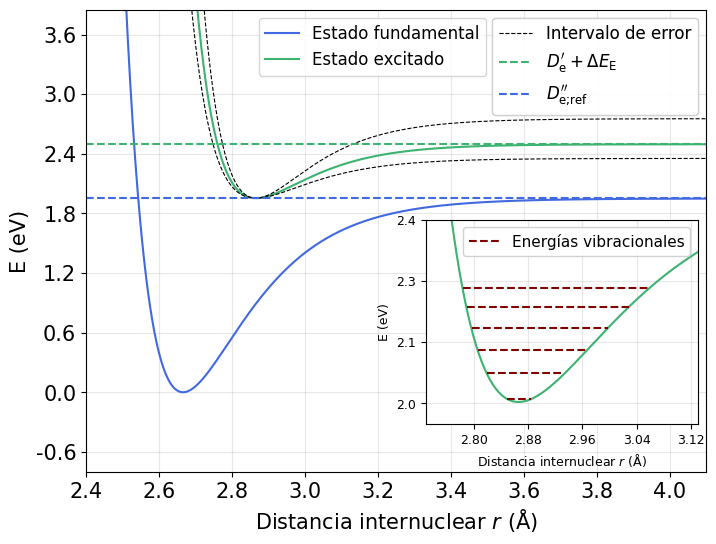

[ 0.  4.  8. 12. 16. 20.]


In [ ]:

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from scipy.optimize import curve_fit


from google.colab import files

# --- Configuración tipográfica y estilo ---
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # tamaño de texto por defecto
plt.rc('axes', titlesize=MEDIUM_SIZE)    # título de ejes
plt.rc('axes', labelsize=MEDIUM_SIZE)    # etiquetas de ejes
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamaño de etiquetas en eje x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamaño de etiquetas en eje y
plt.rc('legend', fontsize=12)            # leyendas
plt.rc('figure', titlesize=BIGGER_SIZE)  # título general de figura
plt.rc('savefig', dpi=350, transparent=False)  # guardar figuras con buena resolución

# Carpeta donde se guardarán las figuras
carpeta_temp = r"C:\Users\jereo\Downloads\EC\to2\figuras"
os.makedirs(carpeta_temp, exist_ok=True)


De_f = 1.95      # eV
wchi_f = 0.71    #cm^-1 (referencia)
re_f = 2.666      # en Å  (valor random)

# De_e = 0.6
# wchi_e = 1.5e11 / (np.pi * 2 * c) #cm^-1
# deltaE = 1.9515       #eV
re_e = 2.866            # en Å (valor random)
# w_e= 2.36e13          #1/s
# wchi_e_s= 1.5e11      #1/s

# --- Dominio ---
r = np.linspace(2.3, 5, 2000)

# --- Cálculo ---
a_f = ref_alpha_fund
a_e = alpha_exc
V_exc = morsea(r, a_e/1e9, re_e, De_exc) + delta
nu = np.linspace(0, 20, 6)
print(a_e)
# --- Figura principal ---
fig, ax = plt.subplots(figsize=(8,6))
l1, = ax.plot(r, morsea(r, a_f/1e9, re_f, De_f), color="royalblue")
l2, = ax.plot(r, V_exc, color="mediumseagreen")
l3, = ax.plot(r, morsea(r, a_e/1e9, re_e, 0.4) + delta, linestyle="--", color="black", linewidth=0.8)  #Divido a la 1/e9 para tener r en Amstrongs
l4, = ax.plot(r, morsea(r, a_e/1e9, re_e, 0.8) + delta, linestyle="--", color="black", linewidth=0.8)

# Líneas horizontales De
l5 = ax.axhline(y=De_exc + delta, color='mediumseagreen', linestyle='--', linewidth=1.5)
l6 = ax.axhline(y=De_f, color='royalblue', linestyle='--', linewidth=1.5)

ax.set_xlim(2.4, 4.1)
ax.set_ylim(-0.8, 3.85)
ax.set_xlabel(r"Distancia internuclear $r$ (Å)")
ax.set_ylabel("E (eV)")
ax.yaxis.set_major_locator(MaxNLocator(nbins=8))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax.grid(alpha=0.3)

# --- Leyendas separadas ---
legend1 = ax.legend([l1, l2], ["Estado fundamental", "Estado excitado"],
                    loc='upper left', bbox_to_anchor=(0.265,1))
ax.add_artist(legend1)

legend2 = ax.legend([l3, l5, l6],
                    ["Intervalo de error", r"$D_\text{e}^{\prime}+\Delta E_\text{E}$", r"$D_{\text{e;ref}}^{\prime\prime} $"],
                    loc='upper right', bbox_to_anchor=(1,1))
ax.add_artist(legend2)

# --- Subfigura (zoom) ---
ax_inset = fig.add_axes([0.55, 0.19, 0.34, 0.34])
ax_inset.plot(r, V_exc, color="mediumseagreen")

for i in nu:
    E_e = E(w_exc, chi_w_exc, i) + delta
    mask = V_exc < E_e
    if np.any(mask):
        indices = np.where(mask)[0]
        left = r[indices[0]]
        right = r[indices[-1]]
        ax_inset.hlines(y=E_e, xmin=left, xmax=right, color='maroon',
                        linestyle='--', linewidth=1.5)

# 🔹 Agregamos leyenda dentro del zoom
ax_inset.legend([Line2D([0], [0], color='maroon', linestyle='--', linewidth=1.5)],
                ["Energías vibracionales"],
                loc='upper right', fontsize=11, frameon=True, framealpha=0.9)

# --- Configuración de ejes ---
ax_inset.set_xlim(2.73, 3.13)
ax_inset.set_ylim(1.9, 2.4)

ax_inset.set_xlim(2.73, 3.13)
ax_inset.set_ylim(1.9, 2.4)
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_xlabel(r"Distancia internuclear $r$ (Å)", fontsize=9)
ax_inset.set_ylabel(r"E (eV)", fontsize=9)
ax_inset.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_inset.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_inset.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax_inset.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax_inset.tick_params(axis='both', which='both', labelsize=9)
ax_inset.grid(alpha=0.3)

# --- Guardar figura ---
ruta_figura = os.path.join(carpeta_temp, "potenciales_Morse_I2.png")
plt.savefig(ruta_figura)

plt.show()
print(nu)

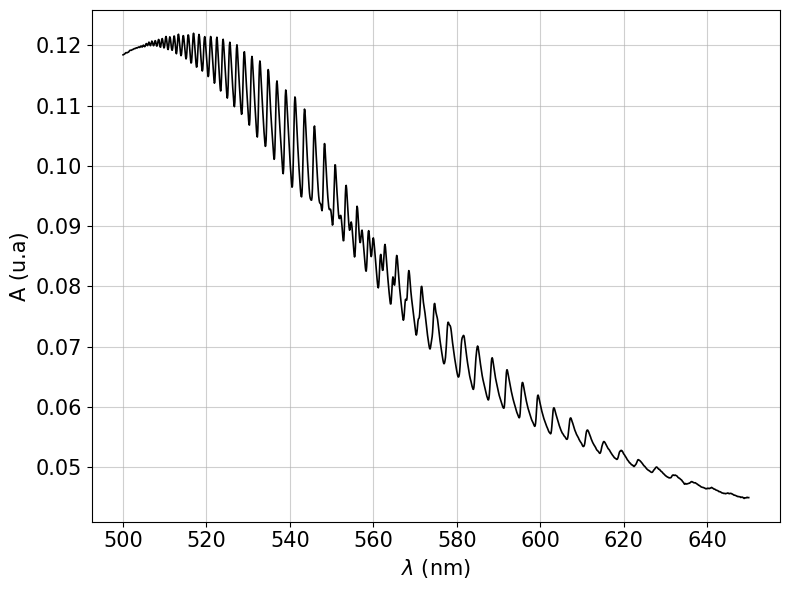

In [ ]:
# --- GRAFICAR T(λ) vs λ CON EL MISMO FORMATO ---

plt.figure(figsize=(8, 6))

plt.plot(
    datos['lambda'],
    datos['A(lambda)'] + 1.9,
    marker='o',
    linestyle='-',
    color='black',
    markersize=0,
    linewidth=1.2,
    alpha=1,
)

plt.xlabel(r"$\lambda$ (nm)")
plt.ylabel(r"A (u.a)")
# plt.title(r"Transmisión $T(\lambda)$ vs Longitud de onda $\lambda$")
plt.grid(True,  alpha=0.6)
plt.tight_layout()
plt.savefig(f'{carpeta_temp}/abs.png', dpi=350, transparent=False)
# Mostrar o guardar
plt.show()
# plt.savefig(os.path.join(direc, "transmision_vs_lambda.png"))


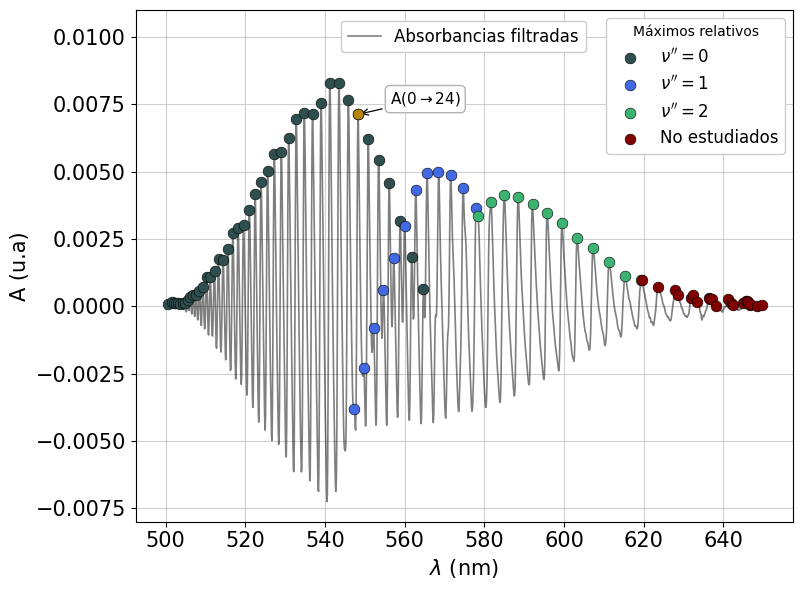

In [ ]:
# --- GRAFICAMOS ---
plt.figure(figsize=(8, 6))

# Filtramos solo valores positivos de A(lambda)
df_nu0_pos = df_nu0[df_nu0['A(lambda)'] > 0].reset_index(drop=True)

# --- Máximos relativos ---

# ν'' = 0 (gris)
sc0 = plt.scatter(df_nu0_pos["lambda"], df_nu0_pos['A(lambda)'],
                  color='darkslategrey', marker='o', s=60, label=r"$\nu''=0$",
                  edgecolors='k', zorder=3, linewidths=0.4)

# Buscamos el punto con lambda ≈ 548.3 nm
target_lambda = 548.3
# índice del valor más cercano
idx_closest = (df_nu0_pos['lambda'] - target_lambda).abs().idxmin()
lambda_closest = float(df_nu0_pos.loc[idx_closest, 'lambda'])
A_closest = float(df_nu0_pos.loc[idx_closest, 'A(lambda)'])
diff = abs(lambda_closest - target_lambda)

# Tolerancia (en nm) para considerar que es efectivamente el mismo punto
tol = 0.2

if diff <= tol:
    # resaltamos el punto exacto (o muy cercano)
    sc_high = plt.scatter(lambda_closest, A_closest,
                         color='darkgoldenrod', edgecolors='k', s=60, marker='o',
                         linewidths=0.4, zorder=5)
    # anotación opcional al lado del punto
    plt.annotate(r"A($0\rightarrow{24}$)",
                 xy=(lambda_closest, A_closest),
                 xytext=(lambda_closest + 8, A_closest+0.0004),
                 fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="0.7"),
                 arrowprops=dict(arrowstyle="->", lw=0.9))
# else:
#     # si no hay ninguno dentro de la tolerancia, avisamos y marcamos el más cercano igual
#     print(f"Aviso: no se encontró lambda ≈ {target_lambda} nm dentro de ±{tol} nm. "
#           f"Marcando el más cercano: {lambda_closest:.3f} nm (diferencia {diff:.3f} nm).")
#     sc_high = plt.scatter(lambda_closest, A_closest,
#                          color='gold', edgecolors='k', s=120, marker='o',
#                          linewidths=1.2, zorder=5, label=f"Punto más cercano λ={lambda_closest:.1f} nm")
#     plt.annotate(r"A$_0\rightarrow{24}$",
#                  xy=(lambda_closest, A_closest),
#                  xytext=(lambda_closest + 2, A_closest + 0.0008),
#                  fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="0.7"),
#                  arrowprops=dict(arrowstyle="->", lw=0.8))

# ν'' = 1
sc1 = plt.scatter(df_nu1["lambda"], df_nu1['A(lambda)'],
                  color='royalblue', marker='o', s=60, label=r"$\nu''=1$",
                  edgecolors='k', zorder=3, linewidths=0.4)

# ν'' = 2 dividido en dos colores
df_nu2_pos = df_nu2[df_nu2['A(lambda)'] > 0].copy()
df_nu2_pos_sorted = df_nu2_pos.sort_values('lambda').reset_index(drop=True)

# Primeros 12 puntos → verde
sc2 = plt.scatter(df_nu2_pos_sorted.loc[:11, "lambda"], df_nu2_pos_sorted.loc[:11, 'A(lambda)'],
                  color='mediumseagreen', marker='o', s=60, label=r"$\nu''=2$",
                  edgecolors='k', zorder=3, linewidths=0.4)

# Resto → marrón oscuro
sc3 = plt.scatter(df_nu2_pos_sorted.loc[12:, "lambda"], df_nu2_pos_sorted.loc[12:, 'A(lambda)'],
                  color='maroon', marker='o', s=60, label=r"No estudiados",
                  edgecolors='k', zorder=3, linewidths=0.4)

# Curva de fondo
ln1, = plt.plot(datos['lambda'], filtered, linestyle='-', alpha=0.5,
                color='black', linewidth=1.2, label='Absorbancias filtradas')

plt.xlabel(r"$\lambda$ (nm)")
plt.ylabel(r"A (u.a)")
plt.grid(True, alpha=0.6)

# --- Leyenda 1: Máximos relativos (ahora incluimos el punto resaltado) ---
legend1 = plt.legend(handles=[sc0, sc1, sc2, sc3],
                     title="Máximos relativos",
                     loc='upper right', bbox_to_anchor=(1.0, 1.0), framealpha=1)

# --- Leyenda 2: Curva de fondo ---
legend2 = plt.legend(handles=[ln1],
                     loc='lower right', bbox_to_anchor=(0.697, 0.901), framealpha=1)

# Agregamos ambas leyendas al gráfico
plt.gca().add_artist(legend1)

plt.tight_layout()
plt.ylim(-0.008, 0.011)
plt.savefig(f'{carpeta_temp}/abs_f.png', dpi=350, transparent=False)
plt.show()


/tmp/ipython-input-2329473731.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


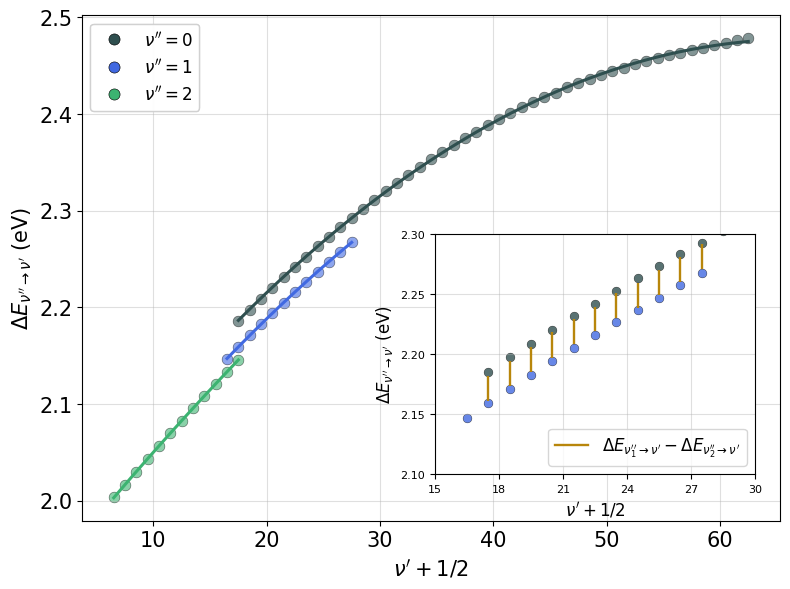

In [ ]:

plt.figure(figsize=(8, 6))
ax = plt.gca()

# --- Dispersión de máximos ---
sc0 = ax.scatter(xdata_0, ydata_0, color='darkslategray', marker='o', s=60,
                 edgecolors='k', linewidths=0.4, zorder=1, alpha=0.6)
sc1 = ax.scatter(xdata_1, ydata_1, color='royalblue', marker='o', s=60,
                 edgecolors='k', linewidths=0.4, zorder=1, alpha=0.6)
sc2 = ax.scatter(xdata_2, ydata_2, color='mediumseagreen', marker='o', s=60,
                 edgecolors='k', linewidths=0.4, zorder=1, alpha=0.6)

# --- Curvas de ajuste ---
ln1, = ax.plot(nu_fit_0, E_fit_0, color='darkslategray', linestyle='-', lw=2.2, alpha=1)
ln2, = ax.plot(nu_fit_1, E_fit_1, color='royalblue', lw=2.2, alpha=1)
ln3, = ax.plot(nu_fit_2, E_fit_2, color='mediumseagreen', lw=2.2, alpha=1,
               label='Ajuste cuadrático')

# --- Etiquetas y grilla ---
ax.set_xlabel(r"$\nu' + 1/2$")
ax.set_ylabel(r"$\Delta E_{\nu''\rightarrow{\nu'}}$ (eV)")
ax.grid(True, alpha=0.4)

# ======================================================
# --- Leyendas con colores sólidos (sin alpha) ---
# ======================================================
dummy0 = mlines.Line2D([], [], color='darkslategray', marker='o', linestyle='None',
                       markersize=8, markeredgecolor='k', markeredgewidth=0.4, label=r"$\nu''=0$")
dummy1 = mlines.Line2D([], [], color='royalblue', marker='o', linestyle='None',
                       markersize=8, markeredgecolor='k', markeredgewidth=0.4, label=r"$\nu''=1$")
dummy2 = mlines.Line2D([], [], color='mediumseagreen', marker='o', linestyle='None',
                       markersize=8, markeredgecolor='k', markeredgewidth=0.4, label=r"$\nu''=2$")

legend1 = ax.legend(handles=[dummy0, dummy1, dummy2],
                    loc='upper left', bbox_to_anchor=(0, 1),
                    frameon=True)
ax.add_artist(legend1)

# ======================================================
# --- SUBGRÁFICO (solo puntos royalblue y gray) ---
# ======================================================
fig = plt.gcf()  # o plt.figure()

axins = fig.add_axes([0.55, 0.2, 0.4, 0.4])

#rayitas
x_points = [17+1/2, 18+1/2, 19+1/2, 20+1/2,21+1/2, 22+1/2, 23+1/2, 24+1/2,25+1/2,26+1/2, 27+1/2]   # posiciones donde querés las líneas
ymins = [2.161, 2.161+0.012, 2.161+0.012*2, 2.161+0.012*3,2.16+0.012*4, 2.159+0.012*5, 2.158+0.012*6, 2.161+0.011*7, 2.161+0.011*8,2.161+0.011*9,2.161+0.011*10]            # límite inferior de cada línea
ymaxs = [2.182, 2.182+0.012, 2.182+0.012*2, 2.182+0.012*3,2.181+0.012*4, 2.179+0.012*5, 2.179+0.012*6, 2.182+0.011*7, 2.182+0.011*8,2.182+0.011*9,2.182+0.011*10]              # límite superior de cada línea

axins.plot([0, 8], [0, 5])  # gráfico de ejemplo

# Líneas verticales limitadas
axins.vlines(x=x_points, ymin=ymins, ymax=ymaxs, colors='darkgoldenrod', linestyles='-', lw=1.7)
# Crear handle para la leyenda
rayitas_handle = Line2D([0], [0], color='darkgoldenrod', lw=1.7, label=r'$\Delta E_{\nu_1^{\prime \prime} \rightarrow{\nu^{\prime}}}-\Delta E_{\nu_2^{\prime \prime} \rightarrow{\nu^{\prime}}}$')

# Agregar a la leyenda del inset
axins.legend(handles=[rayitas_handle], loc='lower right', fontsize=12)


axins.scatter(xdata_0, ydata_0, color='darkslategray', s=40, edgecolors='k', linewidths=0.3, alpha=0.8)
axins.scatter(xdata_1, ydata_1, color='royalblue', s=40, edgecolors='k', linewidths=0.3, alpha=0.8)



# --- Configuración del subgráfico ---
axins.set_xlim(15, 30)
axins.set_ylim(2.1, 2.3)
axins.grid(True, alpha=0.4)

# Etiquetas pequeñas en los ejes
axins.set_xlabel(r"$\nu' + 1/2$", fontsize=12)
axins.set_ylabel(r"$\Delta E_{\nu''\rightarrow{\nu'}}$ (eV)", fontsize=12)
axins.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axins.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axins.xaxis.set_major_locator(MaxNLocator(nbins=5))  # máximo 5 ticks principales
axins.yaxis.set_major_locator(MaxNLocator(nbins=4))
axins.tick_params(axis='both', which='both', labelsize=8)
# , labelbottom=False, labelleft=False
# axins.set_title("Detalle", fontsize=9)




plt.tight_layout()
plt.savefig(f'{carpeta_temp}/trans.png', dpi=350, transparent=False)
plt.show()


In [ ]:
# Crear archivo ZIP de la carpeta temporal
with zipfile.ZipFile('figuras_descarga2.zip', 'w') as zipf:
    for root, dirs, files in os.walk(carpeta_temp):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.basename(file_path))

# Descargar el ZIP
files.download('figuras_descarga2.zip')

AttributeError: 'list' object has no attribute 'download'